Neural Network with Gaussian Noise for Circle Classification
Jared Wyetzner

Resources:
https://www.learnpytorch.io/02_pytorch_classification/
https://pytorch.org/docs/stable/distributions.html#multivariatenormal
GPT-3

In [1]:
import torch
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/gc/hlp0fxfj0jl64cgsm01vkmkm0000gn/T/ipykernel_96571/1594635651.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
#make dataset in dataframe - taken from learnpytorch.io

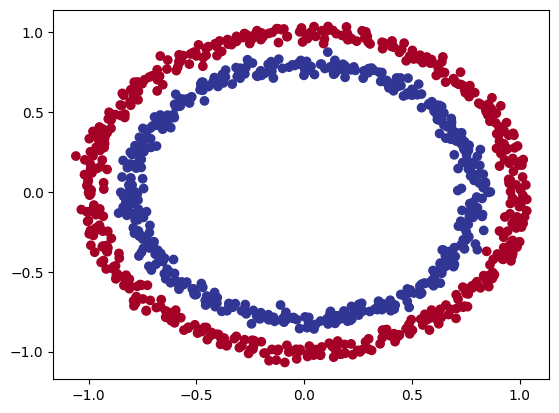

In [3]:
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

#dataset visualized - need to classify red vs blue circle

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [47]:
from torch.distributions.multivariate_normal import MultivariateNormal
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class GaussianNoiseNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GaussianNoiseNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        mean = x[:, :2]  # Adjust based on the number of dimensions for mean
        # print(torch.mean(mean, 1).size())
        # print(x)
        # print(mean)
        # cov_matrix = torch.diag_embed(torch.abs(x[:, 2:])) 
        cov_matrix = torch.tensor([[1/10, 0],[0, 1/10]])
        # print(cov_matrix) # Adjust based on the number of dimensions for covariance
        distribution = MultivariateNormal(mean, cov_matrix)
        rx = distribution.sample()
        # print(rx)
        rx = torch.relu(self.fc1(rx))
        rx = self.fc2(rx)
        
        tensor = []
        for i in range(rx.size(dim=0)):
            tensor.append(rx[i][0].item())
        # print(tensor)
        rx = torch.FloatTensor(tensor)
        # print(rx)
        return rx 
    
# Hyperparameters
input_size = 2 #x and y coordinates
hidden_size = 20 #to be changed
output_size = 1 #1 or 0
learning_rate = 0.001 #to be changed
batch_size = 1000 #training all data points generated
epochs = 50 #to be changed

# Create the dataset and DataLoader
dataset = TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = GaussianNoiseNet(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()  # binary classification
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=learning_rate)
# print(model.parameters)

for epoch in range(epochs):
    for inputs, targets in dataloader:
        # print(targets)
        # mean = inputs[:, :2]
        # cov_matrix = torch.diag_embed(torch.abs(inputs[:, 2:])) 
        # cov_matrix = torch.tensor([[1/10, 0],[0, 1/10]])
        # print(cov_matrix)
        # print(mean)
        # print(inputs.shape)
        # print(targets.shape)
        optimizer.zero_grad()
        outputs = model.forward(inputs)
        #     print(output[0])
        # print(outputs[0][0])
        # print(outputs[0].shape)
        # print(targets.shape)
        loss = criterion(outputs, targets)
        loss.requires_grad = True
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

tensor([0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
        1., 1., 0., 0., 1., 0., 0., 1., 